# Prototyping pointilism project
Notebook to prototype turning images in points

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import display

from random import random
from math import sqrt
from math import floor

## Bring in an image

In [2]:
image = Image.open('IMG_0290.jpg')

In [3]:
image = image.resize(size=[500, 250])

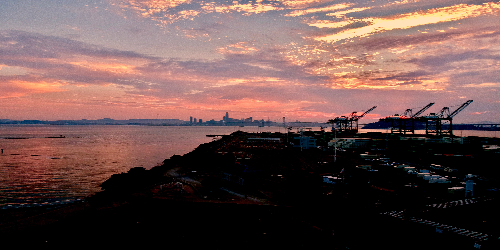

In [4]:
image

In [5]:
# Get np array of image
np_image = np.array(image).astype('float')

## Define functions for simple rectangular plotting

In [6]:
def getColorOfPixel(array, loc, r):
    """Returns RGB tuple [0,1] of average color of the np array
    of an image within a square of width 2r at location loc=[x,y]"""
    left = max(loc[0]-r,0)
    right = min(loc[0]+r,array.shape[1])
    bottom = max(loc[1]-r,0)
    top = min(loc[1]+r,array.shape[0])
    x = range(left,right)
    y = range(bottom,top)
    if len(x) == 0 | len(y) == 0: return (np.nan,np.nan,np.nan)
    R = array[np.ix_(y, x, [0])].mean()/255
    G = array[np.ix_(y, x, [1])].mean()/255
    B = array[np.ix_(y, x, [2])].mean()/255
    return (R,G,B)
    

In [66]:
def plotColorPoint(array, loc, r):
    """Plots point at loc with size r with average color from 
    same in array"""
    color = getColorOfPixel(array,loc,r)
    plt.scatter(loc[0],-loc[1], color = color, s = 3.14*r*r)

In [67]:
def plotRecPoints(array,r,step, fill):
    """Plots rectangular array of points over an image array,
    if fill is True, fills frame, otherwise leaves border"""
 
    if fill:
        x_step = int(array.shape[1] / floor(array.shape[1]/step+1))
        y_step = int(array.shape[0] / floor(array.shape[0]/step+1))
        for x in range(0,array.shape[1],x_step):
            for y in range(0,array.shape[0],y_step):
                plotColorPoint(array,[x,y],r)
    else:
        x_step = int((array.shape[1]-2*r) / int((array.shape[1]-2*r)/step))
        y_step = int((array.shape[0]-2*r) / int((array.shape[0]-2*r)/step))
        for x in range(r,array.shape[1]-r + x_step,x_step):
            for y in range(r,array.shape[0]-r + y_step,y_step):
                plotColorPoint(array,[x,y],r)

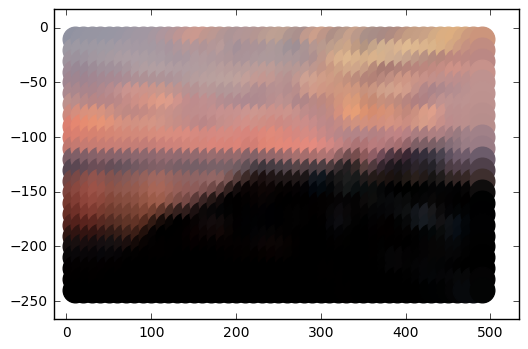

In [69]:
fig = plt.figure()
plotRecPoints(np_image,10,10,False)
plt.axis('tight')
plt.show()

## Now random plotting

In [70]:
def plotRandomPoints(array, n, constant):
    """plots random points over image"""
    h = array.shape[0]
    w = array.shape[1]
    for i in range(0,n):
        loc = [int(random()*w), int(random()*h)]
        r = int(random()*w*constant)
        plotColorPoint(array,loc,r)

## Bring it together

In [71]:
fig = plt.figure(figsize=[10,5])
plotRecPoints(np_image,10,10,False)
plotRandomPoints(np_image,10000,0.015)

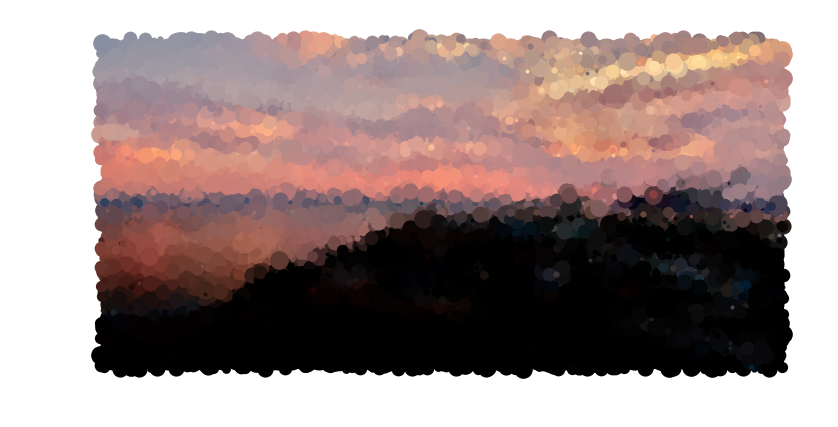

In [72]:
plt.axis("off")
plt.axis("tight")
fig.savefig("out.png",bbox_inches="tight")
display(fig)

## Wrap it up quickly for executing

In [78]:
def pointillismRandom(filename):
    """Takes image and saves pointillized image"""
    print(filename)
    image = Image.open(filename)
    image = image.resize(size=[500, 250])
    np_image = np.array(image).astype('float')
    fig = plt.figure(figsize=[10,5])
    plotRecPoints(np_image,10,10, False)
    plotRandomPoints(np_image,10000,0.015)
    plt.axis("off")
    plt.axis("tight")
    fig.savefig(filename+" - pointilized.png",bbox_inches="tight")
    display(fig)

images/IMG_0216.jpg


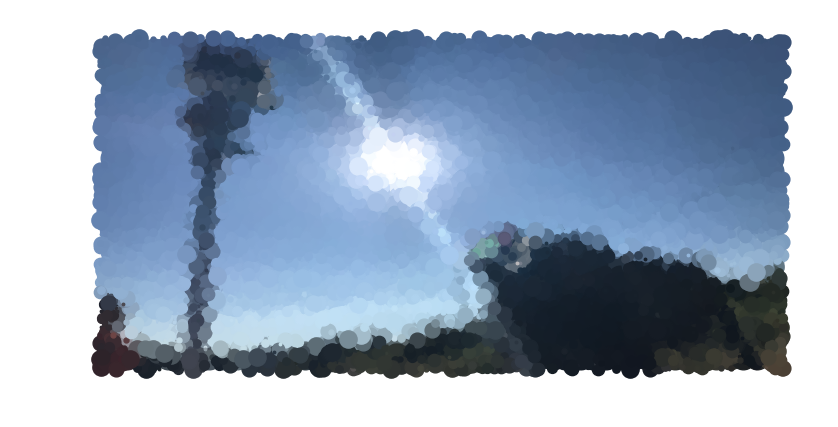

images/IMG_0302.jpg


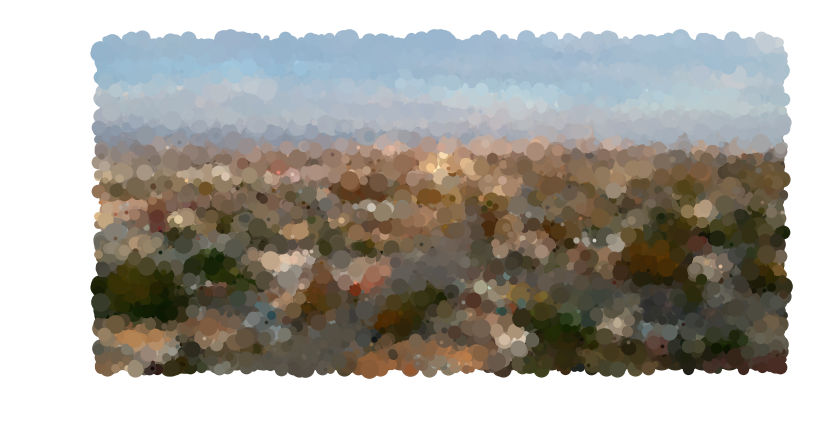

images/IMG_0303.jpg


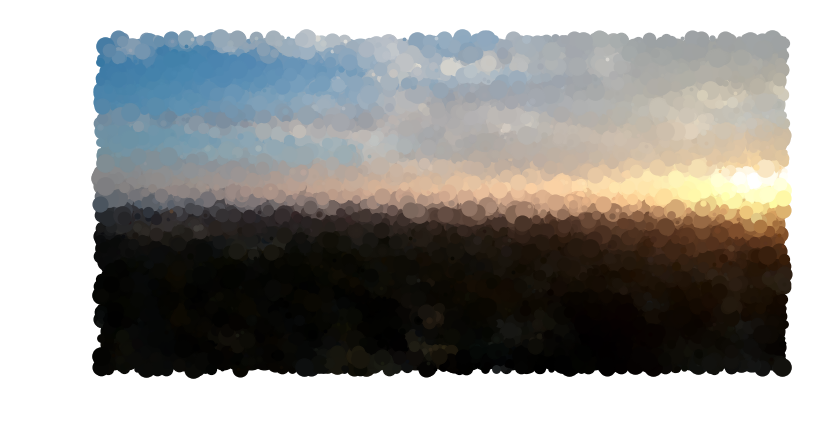

images/Eclipse_Composite.jpg


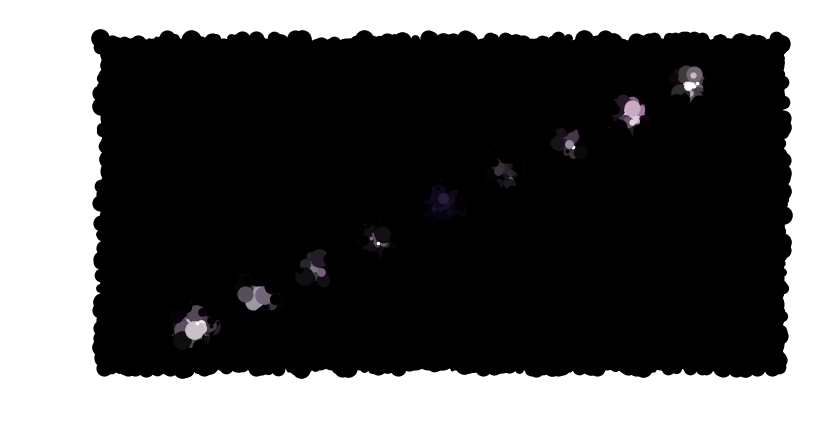

images/DJI_0219.jpg


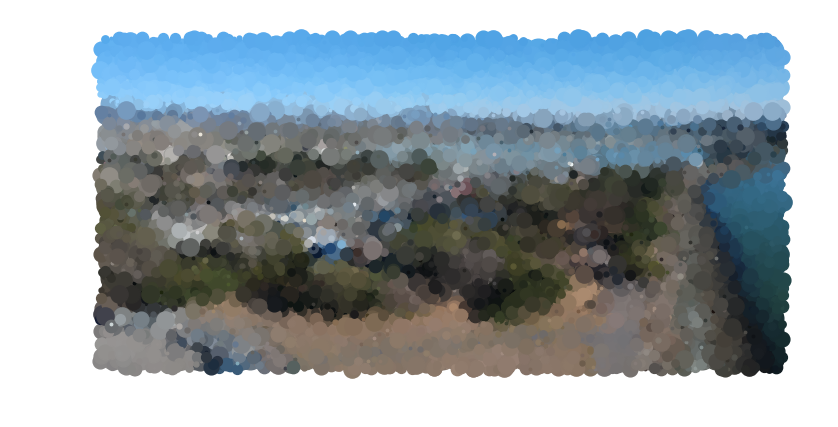

images/IMG_0306.jpg


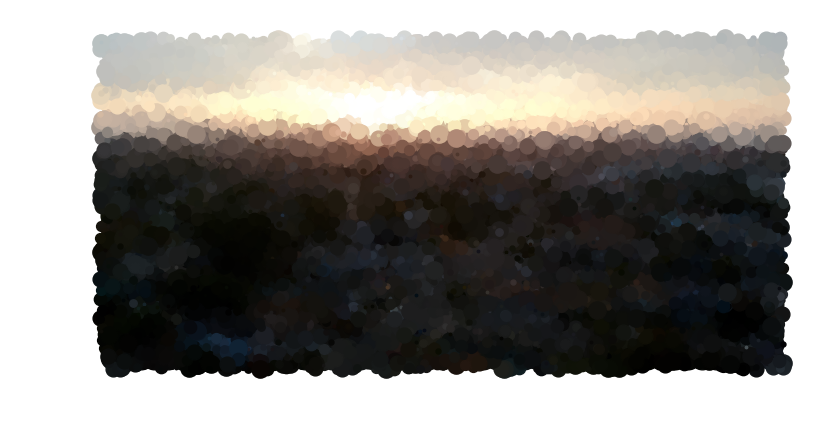

images/IMG_6978.jpg


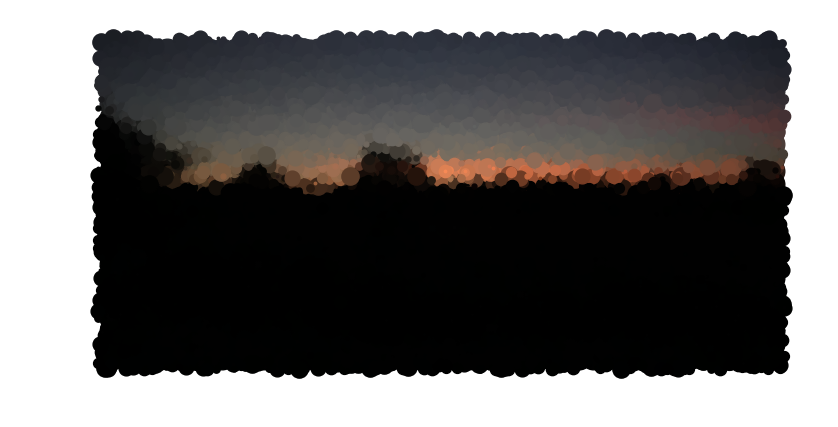

images/IMG_0272.jpg


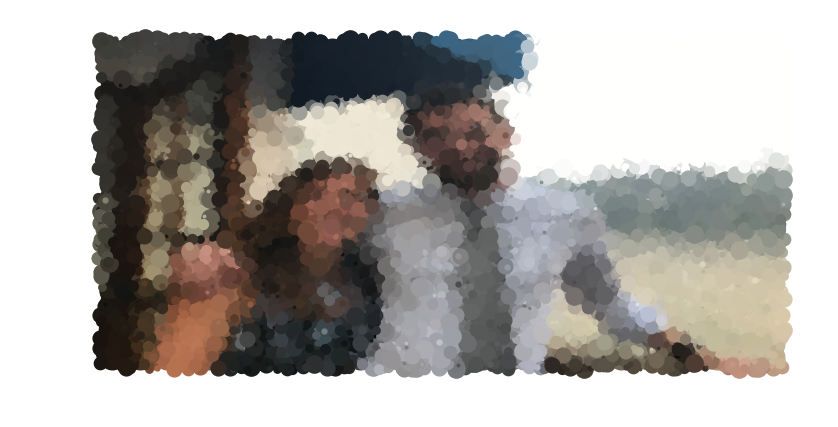

images/IMG_6985.jpg


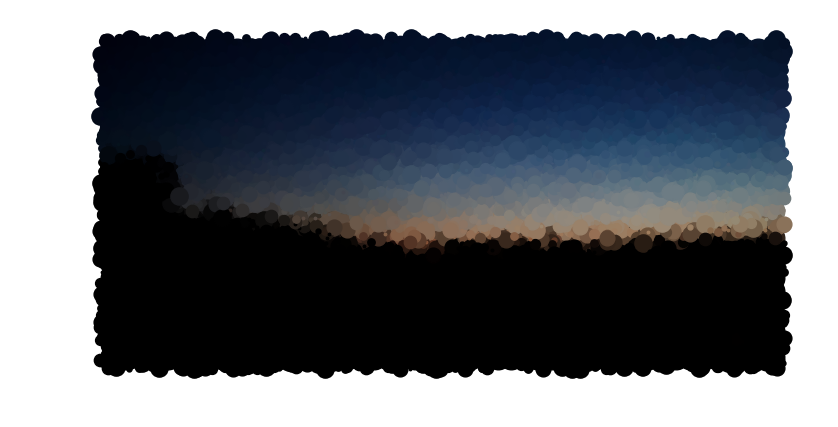

images/IMG_0304.jpg


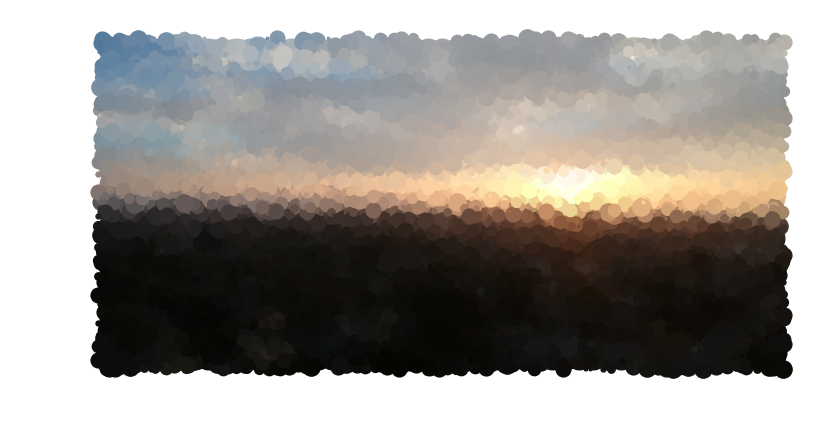

images/IMG_0310.jpg


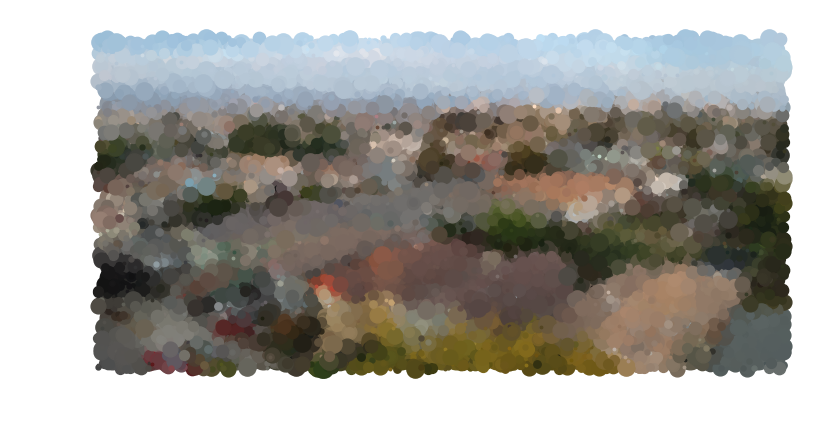

images/IMG_0311.jpg


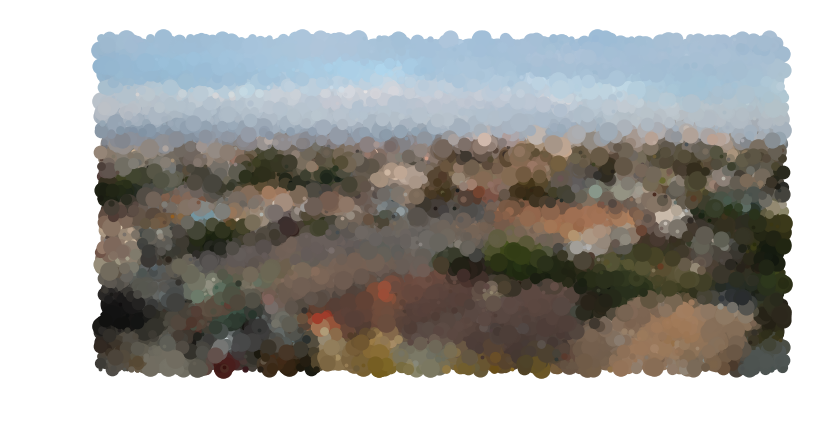

images/IMG_6990.jpg


images/IMG_6976.jpg


images/IMG_6977.jpg


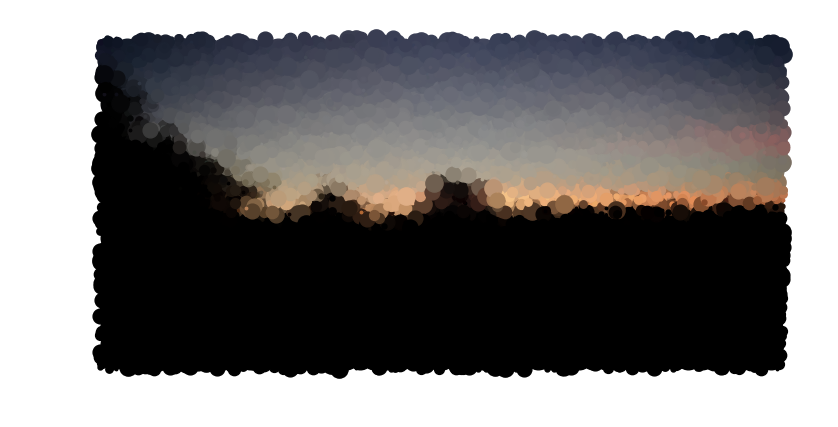

images/IMG_0296.jpg


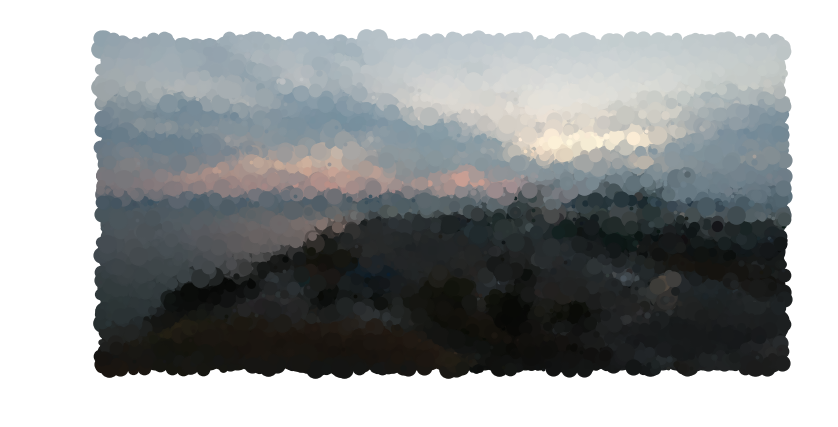

images/IMG_0337.jpg


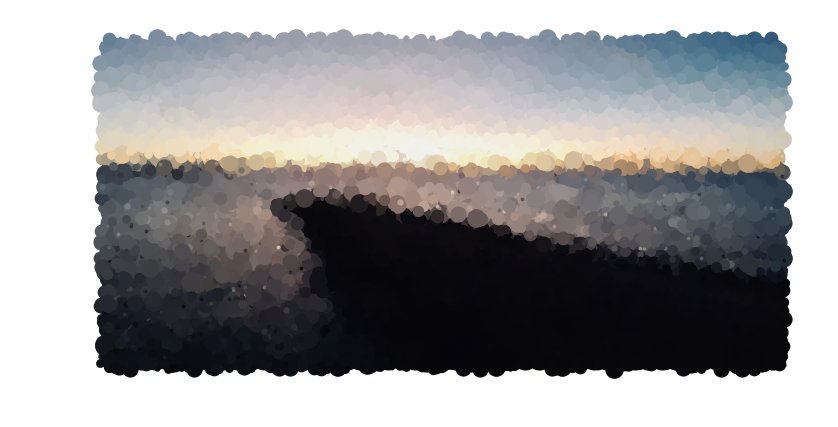

images/IMG_0291.jpg


/Users/timothysennott/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


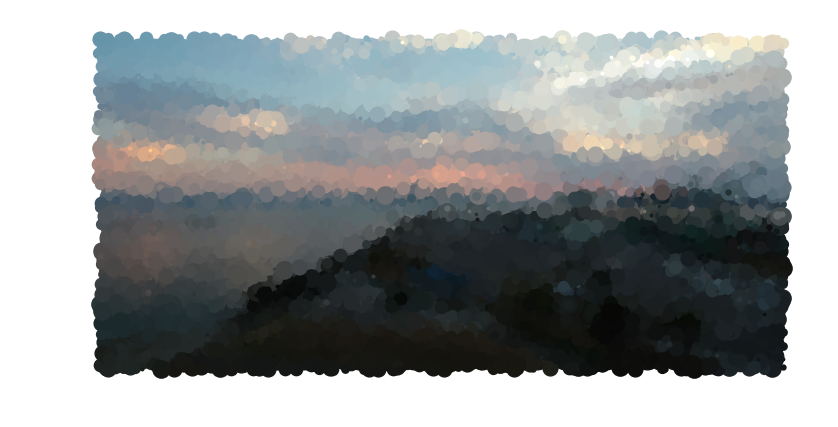

images/IMG_6970.jpg


images/IMG_0292.jpg


images/IMG_0368.jpg


images/IMG_0369.jpg


images/IMG_0219.jpg


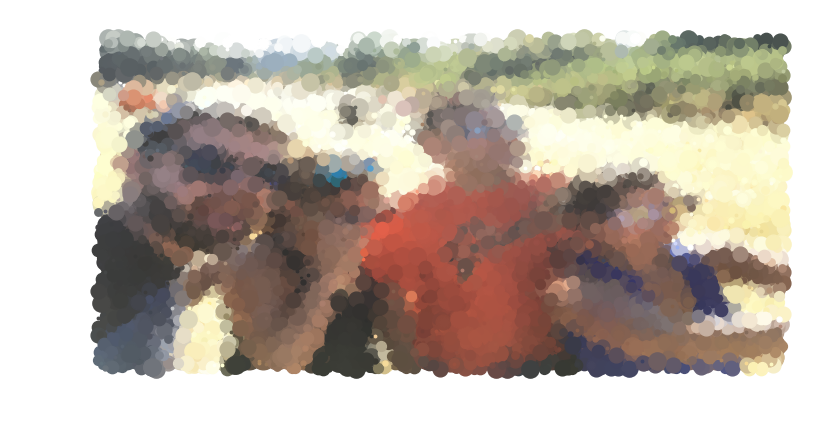

In [79]:
import os
for file in os.listdir("images/"):
    if file.endswith(".jpg"):
        pointillismRandom("images/"+file)